NIM : 2602072552

NAMA : ALICIA JOCELYN SIAHAYA

# Import Libraries

In [106]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Read Data


In [107]:
df = pd.read_csv("data_D.csv")

In [108]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


Our **target variable** is `churn`

### Data Understanding

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [110]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [111]:
df.shape

(41259, 15)

Our data have 41,259 rows and 15 columns

In [112]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41259.000000,41259.000000,4.125900e+04,41251.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,20629.000000,82171.693231,1.569221e+07,656.278733,38.060254,4.999127,55712.496615,1.554328,0.754405,0.496667,112308.502138,0.211324
std,11910.591715,47498.739183,7.137974e+04,80.062353,8.801094,2.802930,62858.019091,0.545629,0.430445,0.499995,50367.874510,0.408252
min,0.000000,3.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.500000,41098.500000,1.563347e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,20629.000000,81851.000000,1.569013e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,30943.500000,123064.500000,1.575714e+07,710.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,41258.000000,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [113]:
df.describe(include='O')

,Surname,Geography,Gender
count,41259,41259,41259
unique,2274,3,2
top,T'ien,France,Male
freq,597,23520,23166


#### Value counts for categorical variable

In [114]:
categorical_cols = ['Geography', 'HasCrCard', 'IsActiveMember', 'churn']
for i in categorical_cols:
    print(df[i].value_counts())
    print()

Geography
France     23520
Spain       9081
Germany     8658
Name: count, dtype: int64

HasCrCard
1    31126
0    10133
Name: count, dtype: int64

IsActiveMember
0    20767
1    20492
Name: count, dtype: int64

churn
0    32540
1     8719
Name: count, dtype: int64



In the target variable, `churn`, there is a class imbalance. 

#### Check for missing values

In [115]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Missing values found in `CreditScore`

# Data Preprocessing

#### Remove irrelevant columns

`Unnamed: 0`, `id`, `CustomerId` are unique values, `Surname` is not relevant to our problem, so i will drop 4 columns

In [116]:
df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [117]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [118]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'churn'],
      dtype='object')

## Split Data

In [119]:
input_df = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
output_df = df['churn']

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [121]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,708.0,France,Female,45.0,2,0.0,1,1,0,182076.97
6996,676.0,Spain,Male,35.0,7,0.0,2,1,0,166053.92
26510,645.0,France,Female,36.0,4,133980.8,1,1,1,112333.63
40020,791.0,Spain,Male,37.0,1,0.0,2,1,0,132973.17
17668,637.0,France,Female,48.0,7,0.0,2,1,1,146573.66


In [122]:
x_train.shape

(33007, 10)

In [123]:
x_train.isna().sum()

CreditScore        7
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [124]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,680.0,Spain,Female,32.0,2,0.00,2,0,1,38614.69
4280,605.0,France,Male,32.0,3,0.00,2,1,0,138051.19
36838,826.0,Germany,Female,39.0,8,113905.48,2,0,1,174043.40
39035,697.0,Spain,Male,44.0,3,0.00,1,1,1,143357.07
22201,550.0,Germany,Female,56.0,2,103391.38,1,1,0,90878.13


In [125]:
x_test.shape

(8252, 10)

### Outliers

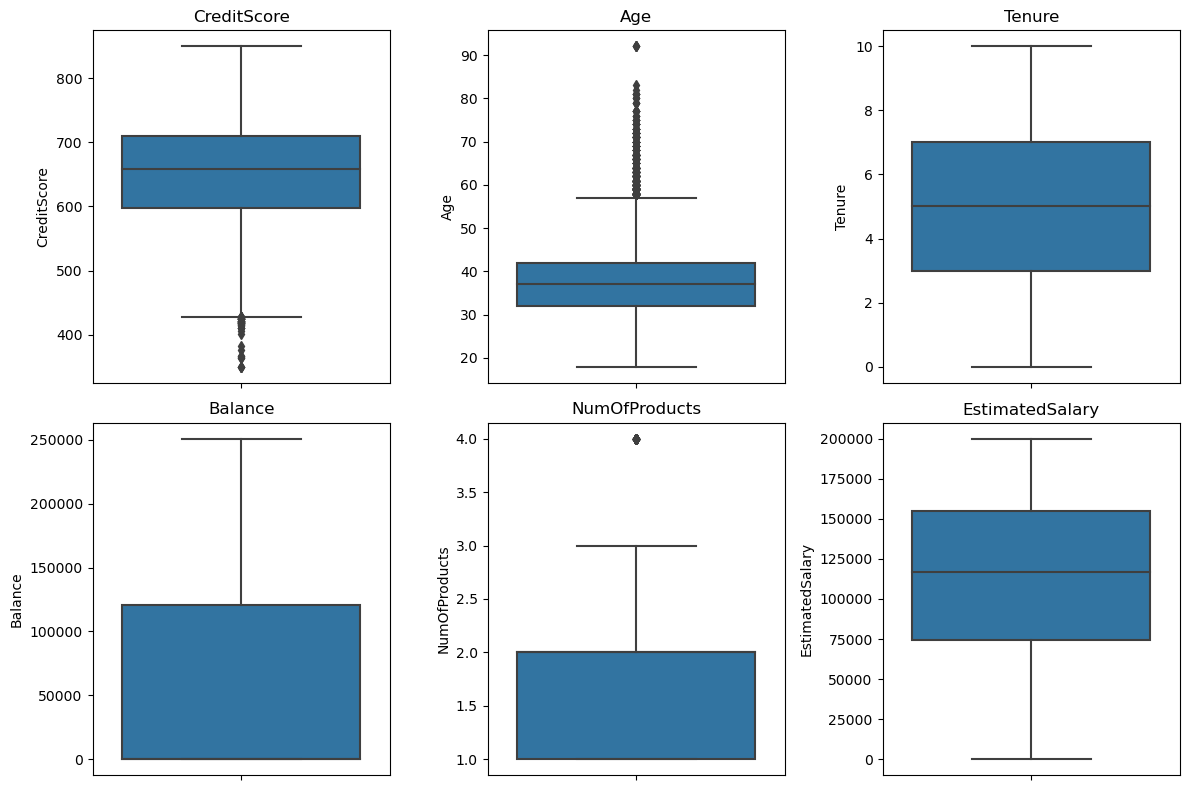

Percentage of outliers in each column:
CreditScore : 0.13%
Age : 2.99%
Tenure : 0.00%
Balance : 0.00%
NumOfProducts : 0.22%
EstimatedSalary : 0.00%


In [126]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=x_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

def count_outliers_iqr(df):
    outliers_count = {}
    for col in x_train[numerical_cols]:
        q1 = x_train[col].quantile(0.25)
        q3 = x_train[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_count[col] = x_train[(x_train[col] < lower_bound) | (x_train[col] > upper_bound)][col].count()
    return outliers_count

outliers_count_iqr = count_outliers_iqr(df)
length_data = df.shape[0]

print("Percentage of outliers in each column:")
for i in x_train[numerical_cols]:
    percentage_outliers = (outliers_count_iqr[i] / length_data) * 100
    print(i, ":", f"{percentage_outliers:.2f}%")

Found outliers in `CreditScore`, `Age` and `NumOfProducts`. This will affect the selection of the type of scaler to be used.

### Missing Value Handling

Since outliers are found in `CreditScore`, we are going to impute with median.

In [127]:
print("Median of CreditScore :", x_train['CreditScore'].median())

Median of CreditScore : 659.0


In [128]:
x_train['CreditScore'].fillna(659.0, inplace = True)
x_test['CreditScore'].fillna(659.0, inplace = True)

In [129]:
x_train.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [130]:
x_test.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Missing values have been imputed, no more missing values found in training and testing set

### Categorical feature encoding

#### 1. Gender

In [131]:
df['Gender'].value_counts()

Gender
Male      23166
Female    18093
Name: count, dtype: int64

In [132]:
gender_encode = {'Gender': {'Male':1, 'Female':0}}
x_train = x_train.replace(gender_encode)
x_test = x_test.replace(gender_encode)

In [133]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,708.0,France,0,45.0,2,0.0,1,1,0,182076.97
6996,676.0,Spain,1,35.0,7,0.0,2,1,0,166053.92
26510,645.0,France,0,36.0,4,133980.8,1,1,1,112333.63
40020,791.0,Spain,1,37.0,1,0.0,2,1,0,132973.17
17668,637.0,France,0,48.0,7,0.0,2,1,1,146573.66


**Put `Gender` encode to a pickle**

In [134]:
filename = 'gender_encode.pkl'
pkl.dump(gender_encode, open(filename, 'wb'))

#### 2. Geography

In [135]:
df['Geography'].value_counts()

Geography
France     23520
Spain       9081
Germany     8658
Name: count, dtype: int64

In [136]:
encode_geography = {'Geography': {"France":0, "Spain":1, "Germany":2}}
x_train = x_train.replace(encode_geography)
x_test = x_test.replace(encode_geography)

In [137]:
x_train_enc.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,23629,708.0,France,0,45.0,2,0.0,1,1,0,182076.97,1.0,0.0,0.0
1,6996,676.0,Spain,1,35.0,7,0.0,2,1,0,166053.92,0.0,0.0,1.0
2,26510,645.0,France,0,36.0,4,133980.8,1,1,1,112333.63,1.0,0.0,0.0
3,40020,791.0,Spain,1,37.0,1,0.0,2,1,0,132973.17,0.0,0.0,1.0
4,17668,637.0,France,0,48.0,7,0.0,2,1,1,146573.66,1.0,0.0,0.0


In [138]:
x_test_enc.head()

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,37555,680.0,Spain,0,32.0,2,0.00,2,0,1,38614.69,0.0,0.0,1.0
1,4280,605.0,France,1,32.0,3,0.00,2,1,0,138051.19,1.0,0.0,0.0
2,36838,826.0,Germany,0,39.0,8,113905.48,2,0,1,174043.40,0.0,1.0,0.0
3,39035,697.0,Spain,1,44.0,3,0.00,1,1,1,143357.07,0.0,0.0,1.0
4,22201,550.0,Germany,0,56.0,2,103391.38,1,1,0,90878.13,0.0,1.0,0.0


**Put `Geography`encoding to a pickle**

In [142]:
filename = 'geography_encode.pkl'
pickle.dump(encode_geography, open(filename, 'wb'))

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

### Scaling

In [144]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41251.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,656.278733,38.060254,4.999127,55712.496615,1.554328,0.754405,0.496667,112308.502138,0.211324
std,80.062353,8.801094,2.802930,62858.019091,0.545629,0.430445,0.499995,50367.874510,0.408252
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,710.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Our dataset consists of numeric and object data types, meaning there are heterogeneity in the data. That's why we encoded `Gender` and `Geography`.

However, from `df.describe()` above, we can see different ranges and measuring points across the columns. `CreditScore` have a range of 350-850 while `Balance` have a range of 0-250898. This can cause bias in the modeling process. Therefore, we need to perform scaling.

For columns with outliers present (`CreditScore` and `Age`), I will use **Robust Scaler** because it is best at scaling when outliers exist. The rest of the columns (`Tenure`, `Balance` and `EstimatedSalary`) I will use Standard Scaler. 

Columns that are binary or categorical, such as `Gender`, `Geography`, `HasCrCard` and `IsActiveMember` are not included in the scaling process.

In [145]:
scaler = RobustScaler()
scaler.fit(x_train[['CreditScore', 'Age']])

x_train[['CreditScore', 'Age']] = scaler.transform(x_train[['CreditScore', 'Age']])
x_test[['CreditScore', 'Age']] = scaler.transform(x_test[['CreditScore', 'Age']])

In [146]:
scaler2 = StandardScaler()
scaler2.fit(x_train[['Tenure', 'Balance', 'EstimatedSalary']])

x_train[['Tenure', 'Balance', 'EstimatedSalary']] = scaler2.transform(x_train[['Tenure', 'Balance', 'EstimatedSalary']])
x_test[['Tenure', 'Balance', 'EstimatedSalary']] = scaler2.transform(x_test[['Tenure', 'Balance', 'EstimatedSalary']])

In [147]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.433628,0,0.8,-1.072085,-0.886546,1,1,0,1.384287,1.0,0.0,0.0
1,0.150442,1,-0.2,0.715373,-0.886546,2,1,0,1.066763,0.0,0.0,1.0
2,-0.123894,0,-0.1,-0.357102,1.244564,1,1,1,0.002202,1.0,0.0,0.0
3,1.168142,1,0.0,-1.429577,-0.886546,2,1,0,0.411210,0.0,0.0,1.0
4,-0.194690,0,1.1,0.715373,-0.886546,2,1,1,0.680728,1.0,0.0,0.0


In [148]:
x_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.185841,0,-0.5,-1.072085,-0.886546,2,0,1,-1.458667,0.0,0.0,1.0
1,-0.477876,1,-0.5,-0.714594,-0.886546,2,1,0,0.511840,1.0,0.0,0.0
2,1.477876,0,0.2,1.072865,0.925244,2,0,1,1.225088,0.0,1.0,0.0
3,0.336283,1,0.7,-0.714594,-0.886546,1,1,1,0.616985,0.0,0.0,1.0
4,-0.964602,0,1.9,-1.072085,0.758006,1,1,0,-0.422976,0.0,1.0,0.0


### Class Imbalance

In [149]:
print(df['churn'].value_counts())
print()

churn_0 = (df['churn']==0).sum()
churn_1 = (df['churn']==1).sum()
len_data = df.shape[0]

print("Percentage of churn class")
print("Churn 0:", "{:.2f}%".format((churn_0 / len_data) * 100))
print("Churn 1:", "{:.2f}%".format((churn_1 / len_data) * 100))

churn
0    32540
1     8719
Name: count, dtype: int64

Percentage of churn class
Churn 0: 78.87%
Churn 1: 21.13%


In our target variable, `churn`, it shows a clear class imbalance for customer that did not churned. This can cause bias towards the prediction of our model.

Our data shows 78.87% of customers that did not churned, or still using the bank's service, we will call it the **majority class**, while customers that churned from the bank's service as **minority class**.

# Modeling

Membuat pemodelan dengan machine learning, dimana anda diminta untuk 
melakukan semua proses pre-processing data yang dibutuhkan sebelum pemodelan klasifikasi. 
Melakukan training machine learning dengan menbandingkan 2 algoritma Random Forest dan 
Xgboost dan memilih algoritma terbaik yang akan anda simpan dalam format pickle. Pastikan 
semua proses disertakan dalam file .ipynb termasuk classification report dari setiap model

## 1. Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [151]:
y_pred_RF = RF.predict(x_test)

In [152]:
from sklearn.metrics import classification_report
print('\nClassification Report MODEL 1 : Random Forest\n')
print(classification_report(y_test, y_pred_RF, target_names=['1','0']))


Classification Report MODEL 1 : Random Forest

              precision    recall  f1-score   support

           1       0.88      0.95      0.91      6513
           0       0.73      0.50      0.59      1739

    accuracy                           0.86      8252
   macro avg       0.80      0.73      0.75      8252
weighted avg       0.85      0.86      0.84      8252



In [153]:
filename = 'RF_model.pkl'
pkl.dump(RF, open(filename, 'wb'))

## 2. XGBoost

In [154]:
import xgboost as xgb

XGBoost = xgb.XGBClassifier()
XGBoost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
y_pred_XGB = XGBoost.predict(x_test)

In [156]:
print('\nClassification Report MODEL 2 : XGBoost\n')
print(classification_report(y_test, y_pred_XGB, target_names=['1','0']))


Classification Report MODEL 2 : XGBoost

              precision    recall  f1-score   support

           1       0.89      0.95      0.92      6513
           0       0.73      0.54      0.62      1739

    accuracy                           0.86      8252
   macro avg       0.81      0.74      0.77      8252
weighted avg       0.85      0.86      0.85      8252



Comparing both models, `XGBoost` shows a better accuracy for this problem. That's why I will choose XGBoost and put it into a pickle file.

In [157]:
filename = 'XGB_model.pkl'
pkl.dump(XGBoost, open(filename, 'wb'))